# Sales Analysis

### Import necessary libraries

In [104]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

### Import and merge files

In [2]:
files = [file for file in os.listdir('/Users/zsoltdiossy/Documents/ProjectDataScience/Sales Analysis/Sales_Data')]


all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('/Users/zsoltdiossy/Documents/ProjectDataScience/Sales Analysis/Sales_Data/' + file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Clean up data

#### Drop rows of NaN

In [3]:
# Check NaNs
nan_df = all_months_data[all_months_data.isna().any(axis = 1)]
nan_df.head()

# Drop NaNs
all_months_data = all_months_data.dropna(how = 'all')

#### Find 'Or' and delete it

In [4]:
or_df = all_months_data[all_months_data['Order Date'].str[0:2] == 'Or'] # Because we know we took the 1st 2 chars from Order Date to get Month
or_df.head()
or_df.shape

# Remove 'Or'
all_months_data = all_months_data[all_months_data['Order Date'].str[0:2] != 'Or']

#### Convert str to numeric

In [18]:
all_months_data['Quantity Ordered'] = pd.to_numeric(all_months_data['Quantity Ordered'])
all_months_data['Price Each'] = pd.to_numeric(all_months_data['Price Each'])
all_months_data.dtypes

### Alternatively use .astype()

Order ID             object
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
Sales               float64
dtype: object

### Augment data with additional columns

#### Add month column

In [6]:
all_months_data['Month'] = all_months_data['Order Date'].str[0:2].astype('int32')

print(all_months_data['Month'].unique())
all_months_data.head()

[12  1  4  5  2  3  8  9  6 11 10  7]


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


#### Add Sales column

In [19]:
all_months_data['Sales'] = all_months_data['Quantity Ordered'] * all_months_data['Price Each']
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1.0,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1.0,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1.0,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1.0,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1.0,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


#### Add City column

In [66]:
# Define function

def get_city(address):
    return address.split(',')[1] # Specific to the format we have in the Purchase Address column!

all_months_data['City'] = all_months_data['Purchase Address'].apply(lambda x: get_city(x))
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1.0,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City
1,295666,LG Washing Machine,1.0,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City
2,295667,USB-C Charging Cable,1.0,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City
3,295668,27in FHD Monitor,1.0,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco
4,295669,USB-C Charging Cable,1.0,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta


#### Add State column

In [74]:
# Define function

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_months_data['State'] = all_months_data['Purchase Address'].apply(lambda x: get_state(x))
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State
0,295665,Macbook Pro Laptop,1.0,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,NY
1,295666,LG Washing Machine,1.0,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,NY
2,295667,USB-C Charging Cable,1.0,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,NY
3,295668,27in FHD Monitor,1.0,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,CA
4,295669,USB-C Charging Cable,1.0,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,GA


#### Add City + State to avoid overlaps (same city name in different states

In [75]:
all_months_data['City and State'] = all_months_data['City'] + ' ' + all_months_data['State']
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,City and State
0,295665,Macbook Pro Laptop,1.0,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,NY,New York City NY
1,295666,LG Washing Machine,1.0,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,NY,New York City NY
2,295667,USB-C Charging Cable,1.0,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,NY,New York City NY
3,295668,27in FHD Monitor,1.0,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,CA,San Francisco CA
4,295669,USB-C Charging Cable,1.0,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,GA,Atlanta GA


### Question 1: What was the best month for sales? How much was earned that month?

In [67]:
sales_monthly = all_months_data.groupby('Month').agg({'Sales':'sum'})
sales_monthly

,Sales
Month,
1,1.822257e+06
2,2.202022e+06
3,2.807100e+06
4,3.390670e+06
5,3.152607e+06
6,2.577802e+06
7,2.647776e+06
8,2.244468e+06
9,2.097560e+06


ANSWER: December was the best month of Sales with appr. 4.6M of Sales.

#### Plot Sales per month

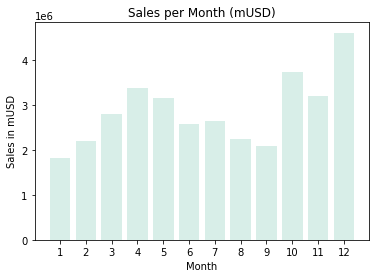

In [146]:
months = range(1, 13)

plt.bar(months, sales_monthly['Sales'], color = '#80C9B5', alpha = 0.3)
plt.xticks(months)
plt.ylabel('Sales in mUSD')
plt.xlabel('Month')
plt.title('Sales per Month (mUSD)')

plt.show()

### Question 2: What US city had the highest number of Sales?

In [76]:
sales_city = all_months_data.groupby('City and State', as_index = False).agg({'Sales':'sum'}).sort_values(by = 'Sales', ascending = False)
sales_city

,City and State,Sales
8,San Francisco CA,8.262204e+06
4,Los Angeles CA,5.452571e+06
5,New York City NY,4.664317e+06
2,Boston MA,3.661642e+06
0,Atlanta GA,2.795499e+06
3,Dallas TX,2.767975e+06
9,Seattle WA,2.747755e+06
7,Portland OR,1.870732e+06
1,Austin TX,1.819582e+06
6,Portland ME,4.497583e+05


ANSWER: San Francisco had the highest number of Sales with appr. 8.2M USD.

#### Plot Sales per City

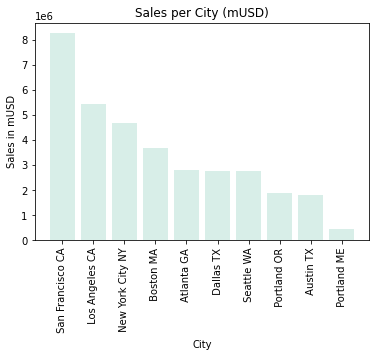

In [145]:
cities = sales_city['City and State']

plt.bar(cities, sales_city['Sales'], color = '#80C9B5', alpha = 0.3)
plt.xticks(cities, rotation = 90)
plt.ylabel('Sales in mUSD')
plt.xlabel('City')
plt.title('Sales per City (mUSD)')

plt.show()


### Question 3: What time should we display advertisements to maximize the likelihood of customer's buying the product?

In [81]:
# Convert Order Date to date time object

all_months_data['Order Date'] = pd.to_datetime(all_months_data['Order Date'])

In [84]:
# Add Hour and Minute columns

all_months_data['Hour'] = all_months_data['Order Date'].dt.hour
all_months_data['Minute'] = all_months_data['Order Date'].dt.minute

all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,City and State,Hour,Minute
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,NY,New York City NY,0,1
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,NY,New York City NY,7,3
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,NY,New York City NY,18,21
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,CA,San Francisco CA,15,13
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,GA,Atlanta GA,12,38


In [94]:
sales_hour = all_months_data.groupby('Hour', as_index = False).count().sort_values(by = 'Hour', ascending = True)
sales_hour.head()


,Hour,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,City and State,Minute
0,0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,3,831,831,831,831,831,831,831,831,831,831,831,831
4,4,854,854,854,854,854,854,854,854,854,854,854,854


#### Plot Sales per Hour

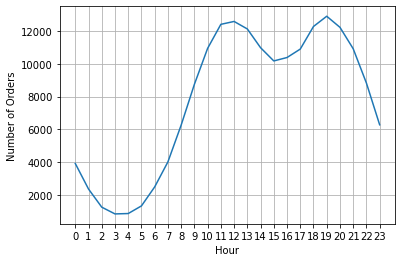

In [95]:
hours = sales_hour['Hour']

plt.plot(hours, sales_hour['Order ID'])
plt.xticks(hours)
plt.grid()
plt.ylabel('Number of Orders')
plt.xlabel('Hour')
plt.show()

plt.show()

ANSWER: The recommendation is that we should advertise around 11am or 7pm to maximize customers buying the product.

### Question 4: What products are most often sold together?

In [100]:
# Get the duplicate Order IDs into a separate dataframe

### https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df = all_months_data[all_months_data['Order ID'].duplicated(keep = False)]

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,City and State,Hour,Minute
16,295681,Google Phone,1.0,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,Boston,MA,Boston MA,12,37
17,295681,USB-C Charging Cable,1.0,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.95,Boston,MA,Boston MA,12,37
18,295681,Bose SoundSport Headphones,1.0,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,99.99,Boston,MA,Boston MA,12,37
19,295681,Wired Headphones,1.0,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.99,Boston,MA,Boston MA,12,37
36,295698,Vareebadd Phone,1.0,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,400.00,New York City,NY,New York City NY,14,32


In [103]:
# Add Grouped column for products

### Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# Get rid of duplicates

df = df[['Order ID', 'Grouped']].drop_duplicates()

df.head()

<ipython-input-103-a84968a6d193>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"


In [111]:
# Count the pairs (2 items)

### Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2))) # we could set this to any number to see the number of items sold together
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### What product sold the most (quantity)? Why do we think it sold the most?

In [115]:
sales_product = all_months_data.groupby('Product', as_index = False).agg({'Quantity Ordered':'sum'}).sort_values('Quantity Ordered', ascending = False)
sales_product

,Product,Quantity Ordered
5,AAA Batteries (4-pack),31017.0
4,AA Batteries (4-pack),27635.0
15,USB-C Charging Cable,23975.0
12,Lightning Charging Cable,23217.0
17,Wired Headphones,20557.0
6,Apple Airpods Headphones,15661.0
7,Bose SoundSport Headphones,13457.0
2,27in FHD Monitor,7550.0
18,iPhone,6849.0
1,27in 4K Gaming Monitor,6244.0


ANSWER: The product sold in the most quantities is the AAA Batteries (4-pack), which was sold 31017 times.

### Plot the quantities sold per product

<ipython-input-140-f2240f53c22a>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(products, rotation = 90)


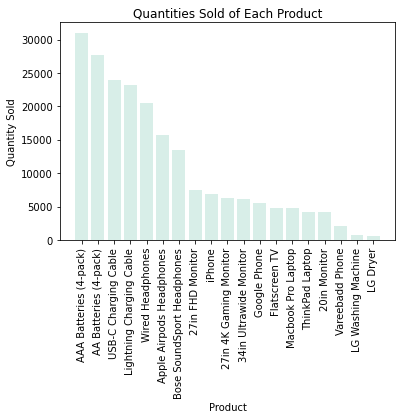

In [140]:
products = sales_product['Product']

fig, ax = plt.subplots()

ax.bar(products, sales_product['Quantity Ordered'], color = '#80C9B5', alpha = 0.3)
ax.set_xticklabels(products, rotation = 90)
ax.set_ylabel('Quantity Sold')
ax.set_xlabel('Product')
ax.set_title('Quantities Solf of Each Product', fontsize = 12)

plt.show()


#### Compare quantities sold with product prices to find out the reason for most sold products

In [120]:
sales_prices = all_months_data.groupby('Product', as_index = False).agg({'Price Each':'mean'})
sales_prices

,Product,Price Each
0,20in Monitor,109.99
1,27in 4K Gaming Monitor,389.99
2,27in FHD Monitor,149.99
3,34in Ultrawide Monitor,379.99
4,AA Batteries (4-pack),3.84
5,AAA Batteries (4-pack),2.99
6,Apple Airpods Headphones,150.00
7,Bose SoundSport Headphones,99.99
8,Flatscreen TV,300.00
9,Google Phone,600.00


<ipython-input-137-0c7c10ea02dd>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = 'vertical')


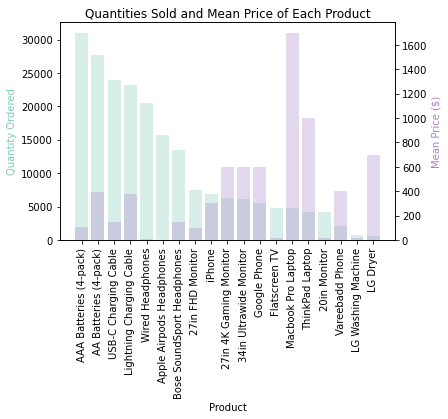

In [137]:
# Plot the quantities and mean prices

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, sales_product['Quantity Ordered'], color = '#80C9B5', alpha = 0.3)
ax2.bar(products, sales_prices['Price Each'], color = '#A380C9', alpha = 0.3)

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color = '#80C9B5')
ax2.set_ylabel('Mean Price ($)', color = '#A380C9')
ax1.set_xticklabels(products, rotation = 'vertical')
ax1.set_title('Quantities Sold and Mean Price of Each Product', fontsize = 12)

plt.show()

ANSWER: One possible answer for why the AAA battery pack sold in the highest quantities could be that it is one of the cheapest products in the portfolio. It is also possible, that as an accessory product (i.e. powering lots of electronic devices) it is purchased along with many different primary products, however we cannot confirm this from this analysis.